# Informe final

### Consigna

Te presentamos los pasos a seguir para realizar el proyecto 04.

1. **Elige tu punto de partida entre dos opciones**:

    + Tus Proyectos 01 y 02

    + Tu Proyecto 03
    
    Si corresponde, emprolija lo hecho hasta el momento, incorporando las correcciones y/o sugerencias que hayas recibido de tu(s) evaluador/a (es/as).

2. **Formula una nueva pregunta, problema o desafío para explorar**. 

3. **Prueba un modelo de Machine Learning nuevo que no hayas visto en la carrera**. En ese caso, debes explicar su funcionamiento y por qué consideras apropiado aplicarlo. La ganancia no necesariamente tiene que ser en desempeño, también puede ser en interpretabilidad o aplicabilidad.

4. **Agrega al proyecto información de otra fuente**. ¡Es sumamente válido! En ese caso, debe estar claramente explicado cómo conseguiste esos datos y qué usos esperas darles. Los datos deben ser accesibles por tu evaluador/a (por ejemplo, puedes subirlos al repositorio). Presta atención a la sensibilidad y privacidad de los datos antes de compartirlos.

5. **Continúa el Análisis Exploratorio de Datos**. Recuerda que es tan importante como entrenar un modelo de Machine Learning.

6. **Sigue las sugerencias que te propusimos en los notebooks** para continuar el Proyecto 03.

Plantea un objetivo *alcanzable*. En esta etapa de tu formación, es preferible un problema sencillo bien abordado que uno ambicioso que no sabes cómo abordar. El objetivo debe estar correctamente explicitado. Debes explicar qué quieres hacer y qué esperas encontrar. Imagina que es una tarea en tu trabajo y tienes que explicarle a un/a jefe/a qué vas a hacer y por qué.

## NLP - Análisis de sentimiento con SpaCy

En este Trabajo Final voy a utilizar SpaCy para entrenar primero un modelo que pueda predecir el puntaje que se le da a un texto (multiclase), y luego un modelo que determine si un texto tiene un sentimiento positivo o negativo (binario). El objetivo es ver si esta librería logra **mejorar los puntajes obtenidos en el TP 3**, especialmente en la clasificación multiclase.

SpaCy es una de las librerías de software para procesamiento de lenguajes naturales más completas, que provee todo tipo de algoritmos y resuelve por sí sola todas las etapas necesarias para NLP: 

* Tokenización

* Lematización

* Etiquetado gramatical

* Reconocimiento de entidades

* Análisis de dependencias

* Reconocimiento de oraciones

* Vectorización de palabras

* Limpieza y normalización de textos

SpaCy está diseñado específicamente para su uso en producción y ayuda a construir aplicaciones que procesan y "entienden" grandes volúmenes de texto. Puede utilizarse para crear sistemas de extracción de información o de comprensión del lenguaje natural, o para preprocesar texto para el aprendizaje profundo.


### Pasos a seguir

El trabajo se va a dividir en dos grandes unidades, cada uno con sus procesos a realizar:

#### 1. **Modelado con scikit-learn**. 
   
   
En primer término, voy a utilizar como benchmark parte de lo realizado en el Trabajo 3, y para ello voy a reutilizar algoritmos de clasificación de scikit-learn. En este punto, habrá que:
   
   
   + **Exploración y transformación del dataset**. En este paso se importará el dataset como un dataframe de Pandas y se verán las características generales del mismo, además de agregar nuevas features si fuese necesario.
   
   
   + **Normalización y tokenización**. La tokenización es el proceso de dividir trozos de texto en partes más pequeñas. En este paso se simplificará al dataset, convirtiendolo en una "bolsa de palabras", extrayendo las raíces de cada palabra si fuera posible y eliminando las que no aportan mayor información.
   
    
   + **Vectorización**. La vectorización es un proceso que transforma un token en un vector, o una matriz numérica que es única y representa varias características de un token. Los vectores se utilizan para encontrar similitudes entre palabras, clasificar textos y realizar otras operaciones de NLP.
   
   
   + **Clasificación**. El último paso es entrenar un modelo de clasificación con un algoritmo de Machine Learning. 

#### 2. **Modelado con SpaCy**. 
   
   Voy a usar la librería SpaCy para comparar los resultados con los obtenidos en el benchmark. Para ello, los pasos a seguir son:
   
   + **Exploración y transformación del dataset**. Este paso consiste en definir una función que convierta el dataset en el formato adecuado para entrenar un clasificador en SpaCy. Además, hay que procurar las muestras de entrenamiento y testeo.
   
   
   + **Evaluación**. Hay que definir una función de evaluación que muestre cómo "aprende" el modelo en cada iteración, aunque también voy a usar las métricas de evaluación provistas por scikit-learn para poder comparar con el benchmark.
   
   
   + **Entrenamiento del modelo**. SpaCy incluye una serie de modelos preentrenados en una vasta cantidad de idiomas, y un pipeline con todos los pasos a realizar para ejecutar tareas de clasificación en machine learning. Para este trabajo, hay que definir una función que entrene y actualice el modelo de SpaCy con las etiquetas que se quieren predecir, incorporadas al corpus de documentos que se van a utilizar, porque si se usara únicamente el que trae por defecto la librería los resultados no van a ser tan buenos. Se trata, en definitiva, de un *aprendizaje de transferencia* (Transfer learning).

## Exploración del Dataset

El primer paso es cargar los sets de datos. Voy a utilizar las Reviews de Amazon del trabajo anterior [(se pueden descargar aquí)](https://github.com/kang205/SASRec), que ya están bien curados, pero únicamente voy a cargar el set de train.

In [1]:
#Importar las librerías para comenzar a explorar el dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_train = pd.read_json(r'C:\Users\dtaub\Documents\Data_Science\proyecto_3\dataset_es_train.json', lines=True)
df_train.sample(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
87396,es_0952005,product_es_0830282,reviewer_es_0019631,3,"Cuando hace mucho viento, no quita totalmente ...",Buena relación calidad precio,es,musical_instruments
34033,es_0799013,product_es_0849787,reviewer_es_0945303,1,Es muy raro porque el tarot viene en una caja ...,No está completo,es,toy
83420,es_0200295,product_es_0307351,reviewer_es_0153090,3,"No me atreví a usarlo con el móvil, aunque pro...",Lo usaría para salpicaduras,es,wireless
78334,es_0280732,product_es_0362001,reviewer_es_0995785,2,Lo tuve que devolver porque es tan grande como...,Es demasiado grande,es,wireless
150606,es_0394309,product_es_0741861,reviewer_es_0011837,4,Me a encantado son tal cual su descripción.,Envió rápido y en perfecto estado.,es,beauty


Los dataframes están compuestos de ocho campos cada uno, con las siguientes características:

 - review_id: el id de la calificación
 - product_id: identificación del producto
 - reviewer_id: id del usuario
 - stars: la calificación en sí (numérica)
 - review_body: el texto de la crítica
 - review_title: título de la crítica
 - language: en qué lenguaje está escrita la crítica
 - product_category: categoría del producto

In [3]:
print("Tamaño del dataset train: "+str(len(df_train)))

Tamaño del dataset train: 200000


5    40000
4    40000
3    40000
2    40000
1    40000
Name: stars, dtype: int64


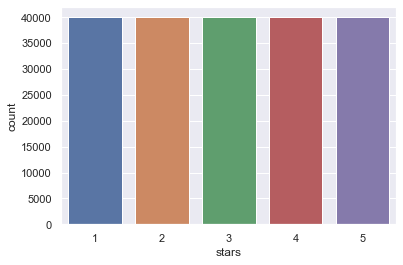

In [4]:
#Distribución de las calificaciones
sns.countplot(df_train.stars)
print(df_train.stars.value_counts())

Las calificaciones van de 1 a 5 y están perfectamente divididas en igual número, 40 mil por cada una en train y 1.000 por cada una en test y dev.

## Modelo de clasificación con scikit-learn

Como primer paso para generar un modelo que pueda predecir la puntuación de un comentario, hay que normalizar y vectorizar los textos, para luego sí poder entrenar el algoritmo de clasificación. Esta etapa SpaCy la resuelve en un solo paso, como se verá más adelante.

In [3]:
#Importar SpaCy para procesar el dataset de palabras
import spacy
nlp = spacy.load("es_core_news_md") #Importar el modelo preentrenado de SpaCy

In [4]:
#Voy a colocar todos los comentarios, título y texto, en una misma columna
df_train["review"] = df_train["review_title"] +" "+ df_train["review_body"]

In [5]:
df_train.sample(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review
51764,es_0524777,product_es_0580464,reviewer_es_0488168,2,Es dura y parece resistente pero en una semana...,Se ensucia rápido,es,wireless,Se ensucia rápido Es dura y parece resistente ...
96498,es_0481634,product_es_0825493,reviewer_es_0661797,3,"Afro, afro no, ya q tiene menos volumen q la d...",Tamaño y calidad pelo buena,es,toy,"Tamaño y calidad pelo buena Afro, afro no, ya ..."
70967,es_0735089,product_es_0739270,reviewer_es_0482503,2,Tardó demasiado tiempo en ser entregado,Demasiado tiempo,es,toy,Demasiado tiempo Tardó demasiado tiempo en ser...
130148,es_0413403,product_es_0135331,reviewer_es_0170698,4,"El cristal templado se pegó perfectamente, sin...",Se pegó perfectamente,es,wireless,Se pegó perfectamente El cristal templado se p...
121087,es_0160371,product_es_0038784,reviewer_es_0551639,4,Un buen regalo para empezar en el mundo del ta...,Práctica sin casi ruido,es,musical_instruments,Práctica sin casi ruido Un buen regalo para em...


In [6]:
#Genero un nuevo dataset con solo los features necesarios para este análisis
train = df_train[["stars","review"]]

Ahora hay que crear una función para normalizar el dataset, para ello se utilizará **Spacy** para tokenizar y lemmatizar.

In [9]:
def normalize(columna):
    normalizada = []
    for i in range(columna.shape[0]):
        review = columna[i] #seleccionar la review
        review = nlp(review)
        #tokenizar y lemmatizar con spacy, quitando signos de puntuación y números
        review = [tok.lemma_.lower() for tok in review if tok.pos_ != 'PUNCT' and tok.pos_ != 'NUM'] 
        review=" ".join(review) #unimos nuevamente la review
        normalizada.append(review) #agregar el resultado a la lista
    return normalizada

In [10]:
#Ahora pasamos el dataset de train por la función
train_norm = normalize(train.review)

In [11]:
#Chequear las primeras 10 entradas
train_norm[:10]

['television nevir nada bueno se me ser ka pantalla en menos de mesar y no haber recibir respuesta del fabricante',
 'dinero tirar a lo basura con este comprar horrible no tener que comprar otro porque ni nosotros que saber inglés ni uno informático después de uno hora ser capaz de instalarlo',
 'solo llegar uno unidad cuando te obligar a comprar te obligar a comprar unidad y te llegar solo uno y no haber formar de reclamar uno autenticar estafar no compreis',
 'producto no recibido no entrar en descalificar al vendedor solo poder decir que tras mesar de esperar seguir sin el producto y tener que contactar con amazon parir reclamar su reembolsar amazon uno se hacer cargar del problema pero yo e desembolsar mi dinero y en mesar me el devolver perdida de tiempo total sin palabra y ustedes decidir',
 'devuelto llega tardar y co lo tallar equivocar',
 'jamás me llegar jamás me llegar y el vendedor nunca contactar conmigo a pesar de intentarlo vez',
 'horroroso el paraguas ser de muy malo c

In [12]:
#Por el tiempo que tomó normalizar, voy a generar un dataframe para poder exortar como csv
df_train_norm = pd.DataFrame({'reviews': train_norm,'stars': train.stars})

#Exporto a CSV
path = "C:\\Users\\dtaub\\Documents\\Data_Science\\TP Final\\df_train_norm.csv"
df_train_norm.to_csv(path, index=False, encoding = 'utf8')

In [2]:
path = "C:\\Users\\dtaub\\Documents\\Data_Science\\TP Final\\df_train_norm.csv"
df_train_norm = pd.read_csv(path, encoding = 'utf8')

**Vectorizar**

Hasta ahora, tengo una **"bolsa de palabras"** ("bag of words"), pero hay que representarlas como un vector numérico para poder modelar un algoritmo de clasificación. Para este paso se utilizará la función CountVectorizer de Scikit-Learn, que permite representar cada vector con un 1 en las palabras que contiene y un 0 en las que no. Para simplificar la tarea y descartar errores, se vectorizarán únicamente las palabras que más veces aparecen en el corpus.

In [158]:
#Importar el algoritmo
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Voy a utilizar solo las 5000 palabras con más frecuencia en todo el corpus para generar los vectores
#Esto se hace para eliminar palabras que aparecen poco y descartar errores

max_features=5000

#Es decir que cada instancia tendrá 5000 features

#Instanciado con n-gram de 1 a 3, que dio un mejor resultado en el trabajo anterior
cv=CountVectorizer(max_features=max_features, ngram_range=(1,3))

In [5]:
#Entrenar y transformar el set
train_vec = cv.fit_transform(df_train_norm.reviews)

In [6]:
#Vamos a chequear algunas de las palabras que fueron vectorizadas
#Para ello, se toman del vector las palabras

all_words = cv.get_feature_names()

#Luego, se vizualisan 50 palabras del set de manera aleatoria
import random
print("50 palabras al azar: ",random.sample(all_words, 50))

50 palabras al azar:  ['quedan', 'haber devolver', 'de este producto', 'por todo', 'que amazon', 'fácil de', 'de noche', 'ser caro', 'más tardar', 'quedo muy', 'lo temperatura', 'igual que', 'mediar', 'perfectamente el', 'lo pintura', 'en mal estar', 'el hemo', 'ser muy', 'uno fundir', 'el demás bien', 'tender', 'ser demasiar grande', 'único pegar ser', 'bien la', 'llenar', 'no ser bueno', 'pobre', 'preciar no', 'pero no', 'sonar', 'embalar', 'discreto', 'ya que', 'parir limpiar', 'usar por', 'el montaje', 'probar con', 'lo devolver', 'no merecer lo', 'este producto no', 'pero tener uno', 'cumple', 'gancho', 'con uno', 'ya que ser', 'lo muñeca', 'suponer', 'el producto no', 'estar en', 'movil']


In [163]:
#Ahora, hay que separar los datos en entrenamiento y test.
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_vec.toarray(), 
                                                    df_train_norm.stars, 
                                                    test_size=0.25, 
                                                    random_state=42)

**Modelar**

Ahora sí, voy a modelar un sistema de clasificación como benchmark.  Para medir el desempeño voy a usar el **Score** propio del algoritmo, que calcula la precisión media, comparando las etiquetas predichas con las verdaderas. El puntaje varía de 0 a 1, siendo 1 el número que se obtiene si todas las etiquetas coinciden.

También la métrica **F1-Score**, que puede interpretarse como una media ponderada entre la **precisión** (proporción de todas las predicciones positivas que son correctas - exactitud) y la **sensibilidad** (proporción de observaciones positivas reales que se predijeron correctamente - exhaustividad), donde la puntuación F1 alcanza su mejor valor en 1 y la peor puntuación en 0. 

Por último, voy a graficar una **Matriz de Confusión**, en la que cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. Esta gráfica facilita ver si el sistema está confundiendo dos clases.

El algoritmo a usar será uno de soporte vectorial (**Support Vector Classification**), que fue el que mejor resultado dio en el [trabajo anterior](https://github.com/elcarpogh/Proyecto-NLP).

In [162]:
#Importo las librerías
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.svm import LinearSVC

In [9]:
#Instancio el algoritmo 
svc = LinearSVC(max_iter=4000,random_state=0,dual=False)

#Entrenar
svc.fit(x_train,y_train)

#Ver la precisión tras el entrenamiento
print("Precisión: ", svc.score(x_test,y_test))

Precisión:  0.5457


In [10]:
#A ver qué ocurre con el F1-Score
y_pred = svc.predict(x_test) #Predecir

#Imprimir el score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.74      0.69      9953
           2       0.47      0.42      0.44      9936
           3       0.46      0.40      0.43      9962
           4       0.49      0.43      0.46     10012
           5       0.62      0.74      0.67     10137

    accuracy                           0.55     50000
   macro avg       0.53      0.55      0.54     50000
weighted avg       0.53      0.55      0.54     50000



Puede verse en este ejemplo que la exactitud  es bastante pareja en todas las etiquetas, mientras que la sensibilidad es mayor con las etiquetas de los extremos. Como se observó en el trabajo anterior, esto da la pista de que es más conveniente convertir el dataset en un problema binario de clasificación.

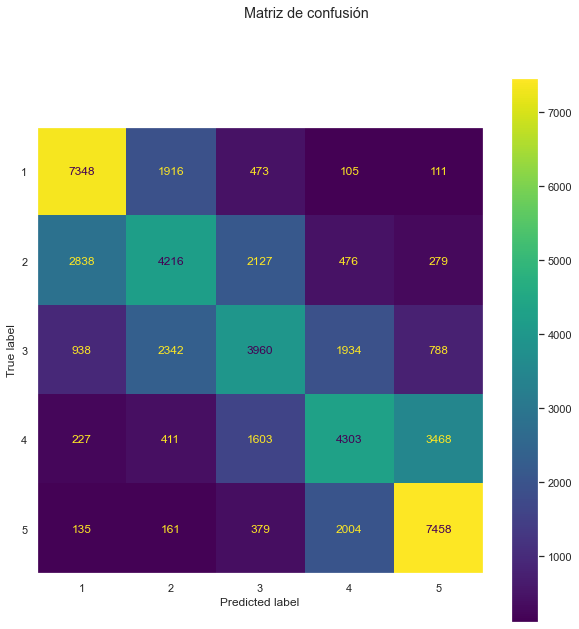

In [11]:
#Gráfico de matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
cm = plot_confusion_matrix(svc, x_test, y_test, ax=ax)
fig.suptitle("Matriz de confusión")
plt.grid(False)
plt.show()

En la matriz queda claro que la predicción de las etiquetas de los extremos es bastante mejor que las intermedias. 

**Clasificación binaria**

Para encarar el problema de clasificación como uno **binario** hay que dividir el dataset en dos grandes grupos de reviews **"positivas"** y **"negativas"**. Para ello, se toman las reviews calificadas con "1" y "2" para el set de "negativas" y las calificadas con "4" y "5" para el set de "positivas". Se van a descartar en esta etapa aquellas reviews con calificación de "3", por ser demasiado ambiguas para este análisis. Asimismo, voy a calificar con "0" a las reviews negativas y con "1" a las positivas.

In [154]:
#Cargo nuevamente el set
df_train_norm = pd.read_csv("C:\\Users\\dtaub\\Documents\\Data_Science\\TP Final\\df_train_norm.csv")

In [155]:
#Separo los sets en "positivos" y "negativos"
train_neg = df_train_norm[(df_train_norm.stars == 1)|(df_train_norm.stars == 2)]
train_pos = df_train_norm[(df_train_norm.stars == 4)|(df_train_norm.stars == 5)]

In [156]:
#Agrego una columna de "0" o de "1" a cada dataset, según sea el caso
train_neg["sentiment"] = np.zeros((len(train_neg,)),dtype=int)
train_pos["sentiment"] = np.ones((len(train_pos,)),dtype=int)

<ipython-input-156-9a283be08054>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_neg["sentiment"] = np.zeros((len(train_neg,)),dtype=int)
<ipython-input-156-9a283be08054>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pos["sentiment"] = np.ones((len(train_pos,)),dtype=int)


In [157]:
#genero el nuevo set
train_bi = pd.concat([train_pos, train_neg])

In [8]:
#Exporto el datasets como csv
path = "C:\\Users\\dtaub\\Documents\\Data_Science\\TP Final\\train_bi.csv"
train_bi.to_csv(path, index=False, encoding = 'utf8')

In [2]:
#Vuelvo a cargarlo
path = "C:\\Users\\dtaub\\Documents\\Data_Science\\TP Final\\train_bi.csv"
train_bi = pd.read_csv(path, encoding = 'utf8')

In [159]:
# Nuevamente voy a utilizar solo las 5000 palabras con más frecuencia en todo el corpus para generar los vectores

max_features=5000

#Instancio con n-gram de 1 a 3
cv=CountVectorizer(max_features=max_features, ngram_range=(1,3))

In [160]:
#Entrenar y transformar el set
train_vec = cv.fit_transform(train_bi.reviews)

In [164]:
#Ahora, separo los datos en entrenamiento y test.
x_train, x_test, y_train, y_test = train_test_split(train_vec.toarray(), 
                                                    train_bi.sentiment, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [165]:
#A ver cómo responde el algoritmo de SVC

svc_bi = LinearSVC(C=1,random_state=1,dual=False)
svc_bi.fit(x_train,y_train)

print("Precisión: ", svc_bi.score(x_test,y_test))

Precisión:  0.925825


In [166]:
#Calculo el F1-Score
y_pred = svc_bi.predict(x_test) #Predecir

#Imprimir el score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     20155
           1       0.92      0.93      0.93     19845

    accuracy                           0.93     40000
   macro avg       0.93      0.93      0.93     40000
weighted avg       0.93      0.93      0.93     40000



Al convertirlo en un problema binario, los puntajes resultan ser **increíblemente superiores** al ejemplo visto anteriormente.

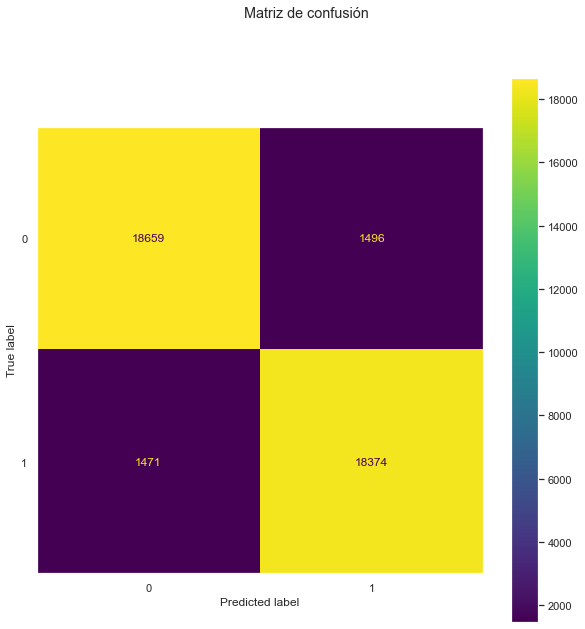

In [14]:
#Grafico una matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
cm = plot_confusion_matrix(svc_bi, x_test, y_test, ax=ax)
fig.suptitle("Matriz de confusión")
plt.grid(False)
plt.show()

Como se puede observar, aumenta notablemente la cantidad de **aciertos** en la predicción de etiquetas con este formato.

## Modelo de clasificación con SpaCy

Ahora sí, voy a usar SpaCy para encarar el mismo problema de clasificación. Las **ventajas** de usar esta librería son múltiples: al estar dedicada completamente a NLP, las tiempos de entrenamiento y procesamiento son menores. Además, no se pierde **interpretabilidad**. Una **desventaja**, sin embargo, es que el proceso de preparación del dataset es más tedioso.

En el ejemplo anterior de benchmark, se usó SpaCy para tokenizar y lemmatizar, pero la verdader potencia de SpaCy radica en su uso para tareas de **clasificación**, **reconocimiento de entidades** y **análisis de dependencias**, entre otras.

In [2]:
#Vuelvo a cargar el dataset 
df_train = pd.read_json(r'C:\Users\dtaub\Documents\Data_Science\proyecto_3\dataset_es_train.json', lines=True)

In [3]:
#Cargo titulo y textto de la review en una misma columna
df_train["review"] = df_train["review_title"] +" "+ df_train["review_body"]

Si bien SpaCy trae un modelo entrenado, para tener más **precisión** en la predicción vamos a entrenarlo con el set de datos y las etiquetas que queremos predecir. SpaCy necesita que el dataset tenga **un formato de tipo Json**, en la que cada entrada tiene que tener todas las categorías que voy a usar, con un "verdadero" o "falso" en cada una. Entonces, el primer paso es generar una función para darle este formato. 

Esta función también va a separar el set en uno de entrenamiento y otro de testeo, mezclando las entradas de forma aleatoria.

In [4]:
import random

def load_data(limit=0, split=0.75):
    stars = pd.get_dummies(df_train.stars) #Hago un one hot encoding para poner "1" y "0" en cada uno de los 5 labels
    cats_dict = stars.to_dict(orient='records') #Reordeno el set
    cats_dict = [{str(key) : val for key, val in sub.items()} #SpaCy necesita que la etiqueta sea un string
               for sub in cats_dict] 
    train_data = list(zip(df_train.review,[{'cats': cats} for cats in cats_dict]))
    
    # Mezclar la data
    random.shuffle(train_data)
    texts, labels = zip(*train_data)
    
    # Separando la data en entrenamiento y test
    split = int(len(train_data) * split)
    return (texts[:split], labels[:split]), (texts[split:], labels[split:])

In [5]:
#Vuelvo a cargar SpaCy con el modelo en español
import spacy
nlp = spacy.load("es_core_news_md")

In [6]:
#Chequeo qué elementos tiene en el pipeline
nlp.pipe_names

['tagger', 'parser', 'ner']

Voy a agregarle al pipeline de SpaCy la función para predecir las categorías. El categorizador puede instanciarse con varios algoritmos distintos de machine learning, para este trabajo lo voy a configurar con un algoritmo de red neuronal convolucional (cnn), que viene incluído en la librería. 

In [7]:
#Instancio el categorizador
textcat = nlp.create_pipe( "textcat", config={"exclusive_classes": True, "architecture": "simple_cnn"})
#Lo agrego al pipeline
nlp.add_pipe(textcat, last=True)
#Confirmo que se haya creado correctamente
nlp.pipe_names

['tagger', 'parser', 'ner', 'textcat']

In [8]:
#Agrego las etiquetas que voy a querer que evalúe el modelo
textcat_labels = ["1","2","3","4","5"]
[textcat.add_label(label) for label in textcat_labels]

[1, 1, 1, 1, 1]

Ahora defino una función de evaluación. Esta función va a servir para ver cómo está respondiendo SpaCy al entrenamiento, y si está "mejorando" en cada iteración o época. 

Para simplificar, en este problema de clasificación multiclase la métrica que voy a definir en entrenamiento es una métrica sencilla de accuracy o precisión, que simplemente calcula el **porcentaje de aciertos sobre el total de muestras**, sin importar a qué etiqueta pertenecen. 

In [114]:
#Función de evaluación

def evaluate(tokenizer, textcat, texts, cats):
    docs = (tokenizer(text) for text in texts)
    tp = 0.0  # Aciertos
    tn = 0.0  # No aciertos
    for i, doc in enumerate(textcat.pipe(docs)):
        #Guarda la etiqueta de test
        gold = [max({**a}, key = lambda key: {**a}[key]) for e, a in cats[i].items()]
        #Guarda la etiqueta predicha
        score = max(doc.cats, key=lambda key: doc.cats[key])
        #Compara las etiquetas
        if score == gold[0]:
            tp += 1.0
        else:
            tn += 1.0
    #Calcula el porcentaje        
    accuracy = (tp)/(tp+tn)
    
    return {"textcat_a": accuracy}

Ahora solo resta preparar el conjunto de datos y comenzar a entrenar

In [10]:
#Llamo a la función que prepara los datos 
#Si bien en el set original tengo 200000 datos los voy a limitar a 20 mil por cuestiones de memoria

n_limit = 20000
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(limit=n_limit)

# Le doy a la data de entrenamiento el formato final
train_data = list(zip(train_texts,train_cats))
train_data[:10]

[('Bonito tutú. El tutu es muy bonito pero la diadema ha llegado rota.',
  {'cats': {'1': 0, '2': 1, '3': 0, '4': 0, '5': 0}}),
 ('Genial!!! Es muy bonito y no me fue nada dificil de montar. Todo venía correctamente y es mas grande de lo que parece. Puede estar perfectamente hasta los 5 meses.',
  {'cats': {'1': 0, '2': 0, '3': 0, '4': 0, '5': 1}}),
 ('Es. Útil Te ayuda mucho a hac',
  {'cats': {'1': 0, '2': 0, '3': 0, '4': 1, '5': 0}}),
 ('Para uso diario Son sencillos pero cumplen para plan batalla',
  {'cats': {'1': 0, '2': 0, '3': 1, '4': 0, '5': 0}}),
 ('Estupenda Funciona perfectamente como indicaban en las instrucciones, pero no le doy las 5 estrellas, pq en avisos de notificaciones de was, no pone el nombre de la persona. Por lo demás genial',
  {'cats': {'1': 0, '2': 0, '3': 0, '4': 1, '5': 0}}),
 ('Regular Al mes fallan la mitad de las teclas',
  {'cats': {'1': 1, '2': 0, '3': 0, '4': 0, '5': 0}}),
 ('Disfraz con publicidad incompleta He comprado este disfraz pensando que ven

Ahora sí, está todo listo para entrenar el modelo con SpaCy

In [11]:
#La cantidad de iteraciones o épocas que va a tener mi entrenamiento
n_iter=5

In [12]:
from spacy.util import minibatch, compounding

#Entreno multilabel
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat'] 
with nlp.disable_pipes(*other_pipes):  # me aseguro de solo entrenar texcat
    
    optimizer = nlp.begin_training()

    print("Entrenando el modelo...")
    print('{:^5}\t{:^5}'.format('LOSS', 'ACCURACY'))

    # Realizar el entrenamiento
    for i in range(n_iter):
        losses = {}
        batches = minibatch(train_data, size=compounding(4., 32., 1.001)) #separa la data en lotes
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=0.2,
                       losses=losses)

      # Llama a la función de evaluación e imprime los resultados
        with textcat.model.use_params(optimizer.averages):
            scores = evaluate(nlp.tokenizer, textcat, dev_texts, dev_cats)
        print('{0:.3f}\t{1:.3f}'  
              .format(losses['textcat'], scores['textcat_a']))

Entrenando el modelo...
LOSS 	ACCURACY
28.008	0.563
24.203	0.573
23.114	0.576
22.168	0.577
21.566	0.578


Luego del entrenamiento, se puede ver que el modelo obtiene un puntaje ligeramente superior al obtenido con el algoritmo de scikit-learn: 0.58 contra 0.55. También se aprecia cómo a medida que pasan las épocas de entrenamiento disminuye la métrica de pérdida (loss), que se define como una **penalidad por una predicción incorrecta**. 

La **pérdida** es un número que indica qué tan **incorrecta** fue la predicción del modelo en un solo ejemplo. Si la predicción del modelo es perfecta, la pérdida es cero; de lo contrario, la pérdida es mayor. Si bien el número es alto porque se hicieron solamente 5 iteraciones y se usó un 10% del dataset original, se ve claramente cómo va disminuyendo, por lo que al aumentando las iteraciones debería mejorar el modelo, claro que llevaría muchísimo más tiempo.

Para ver qué tan bien funciona este modelo y poder graficar una matriz de confusión, voy a generar un nuevo dataset  con  datos de testeo completamente nuevos.

In [15]:
df_test = pd.read_json(r'C:\Users\dtaub\Documents\Data_Science\proyecto_3\dataset_es_test.json', lines=True)

In [16]:
#Cargo titulo y textto de la review en una misma columna
df_test["review"] = df_test["review_title"] +" "+ df_test["review_body"]

In [18]:
df_test.shape

(5000, 9)

In [59]:
#Voy a generar una muestra de 1500 reviews aleatorias para usar como test
test = df_test[["stars","review"]].sample(1500)
test[:10]

,stars,review
4881,5,Calidad/Precio Reloj de diseño bonito yo lo co...
2945,3,"Tapones Tuercas Están bien, Son de plástico no..."
667,1,No me a llegado el producto Nunca me llegó el ...
2897,3,Encaja perfectamente Encaja perfectamente. Ver...
4188,5,Todo un acierto Lo tenemos en el baño en veran...
443,1,Fatal No comprar los globos no duraron ni 1 dí...
4356,5,Muy buen producto El producto llegó a tiempo y...
4637,5,Cámara vigilancia Tenía una cámara que no perm...
2498,3,El limitador de volumen no funciona El product...
1148,2,Incompatible con una funda Me compré una funda...


In [63]:
# Genero un loop para obtener una lista con las predicciones
pred = []
for rev in test.review:
    doc = nlp(rev)
    valor = max(doc.cats, key=lambda key: doc.cats[key])
    pred.append(int(valor))

In [67]:
#Veamos los scores de este modelo
print(classification_report(test.stars, pred))

              precision    recall  f1-score   support

           1       0.68      0.79      0.73       294
           2       0.50      0.48      0.49       274
           3       0.51      0.46      0.49       317
           4       0.53      0.39      0.45       312
           5       0.64      0.79      0.71       303

    accuracy                           0.58      1500
   macro avg       0.57      0.58      0.57      1500
weighted avg       0.57      0.58      0.57      1500



Tal como sucedió con el modelo de Linear SVC, los puntajes se muestran con mayor exactitud en las etiquetas de los extremos, mientras que en las intermedias el modelo parece tener más problemas para clasificar.

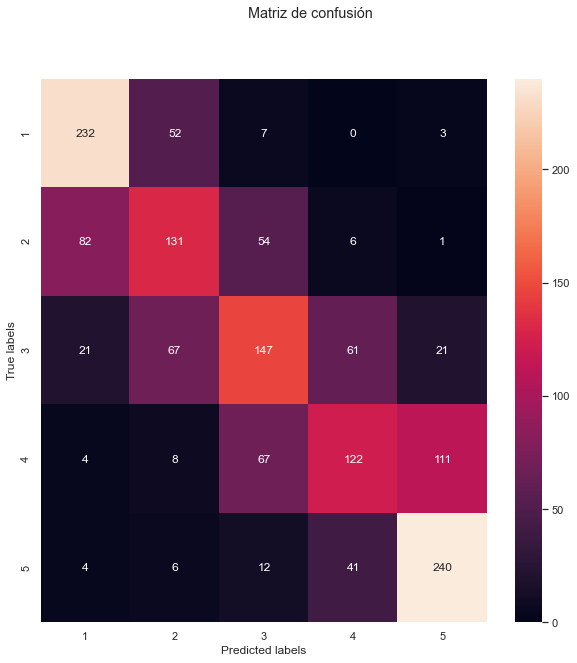

In [77]:
#Grafico una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test.stars, pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
fig.suptitle("Matriz de confusión")
ax.xaxis.set_ticklabels([1,2,3,4,5]); ax.yaxis.set_ticklabels([1,2,3,4,5]);

En la matriz de confusión queda en evidencia que la predicción de las etiquetas "1" y "5" es bastante más precisa que las intermedias.

Una de las grandes ventajas de SpaCy es que permite probar cómo clasificaría un texto cualquiera que querramos ingresar, sin necesidad de tener que vectorizar como ocurre con el algoritmo de Linear SVC o similares. Por ejemplo:

In [81]:
calif_prueba = "Me gustó el producto. Llegó en tiempo y forma. Lo recomiendo."
doc = nlp(calif_prueba)
valor = max(doc.cats, key=lambda key: doc.cats[key])
print("Calificación obtenida: "+str(valor))

Calificación obtenida: 5


In [84]:
#Probar con un texto más ambiguo
calif_prueba = "El producto está bien pero no es el color que quería y tardó en llegar."
doc = nlp(calif_prueba)
valor = max(doc.cats, key=lambda key: doc.cats[key])
print("Calificación obtenida: "+str(valor))

Calificación obtenida: 3


Esto es posible porque SpaCy vectoriza el texto ingresado como una de sus funciones en el pipeline. Este es uno de los factores que lo vuelve tan conveniente. Ejemplo:

In [85]:
#Mostrar los primeros 10 elementos del vector
doc.vector[:10]

array([-0.02767627,  2.0429187 , -1.4820538 ,  0.11711743, -0.6939938 ,
       -0.56216455, -0.16975766,  1.5958326 , -0.78120303,  0.28527397],
      dtype=float32)

**Clasificación binaria**

Nuevamente, hay que dividir el dataset en dos grandes grupos, y luego adaptar las funciones para darle el formato al texto.

In [86]:
#Separo los sets en "positivos" y "negativos"
neg = df_train[(df_train.stars == 1)|(df_train.stars == 2)]
pos = df_train[(df_train.stars == 4)|(df_train.stars == 5)]

In [87]:
#Agrego la columna con el sentimiento
neg["sentiment"] = "NEG"
pos["sentiment"] = "POS"

<ipython-input-87-6b8a6e58e9eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg["sentiment"] = "NEG"
<ipython-input-87-6b8a6e58e9eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos["sentiment"] = "POS"


In [88]:
#genero el nuevo set
train_bi = pd.concat([pos, neg])
train_bi.sample(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review,sentiment
56200,es_0779700,product_es_0786159,reviewer_es_0674162,2,Al estos auriculares la batería le dura entre ...,Poca batería,es,electronics,Poca batería Al estos auriculares la batería l...,NEG
148742,es_0244290,product_es_0807869,reviewer_es_0613542,4,"Para el dia a dia, de traqueteo, y si no le ex...",Muy buena relacion calidad/precio,es,electronics,Muy buena relacion calidad/precio Para el dia ...,POS
156051,es_0958642,product_es_0741074,reviewer_es_0798829,4,"Cumple con la función de lubricar, para el res...",Lubricante,es,drugstore,"Lubricante Cumple con la función de lubricar, ...",POS
49858,es_0863252,product_es_0485307,reviewer_es_0006264,2,"Por ese precio no se puede pedir calidad, pero...",Decepción,es,home,Decepción Por ese precio no se puede pedir cal...,NEG
185422,es_0093003,product_es_0813686,reviewer_es_0318332,5,Cumple perfectamente la función . la unica peg...,Buen producto,es,sports,Buen producto Cumple perfectamente la función ...,POS


In [89]:
bi_train = train_bi[["review","sentiment"]]
bi_train.sample(5)

,review,sentiment
17292,Ha llegado roto Me parece que cuando se compra...,NEG
45865,"No mantiene el calor No está mal,pero no manti...",NEG
176744,Buen producto Muy contento con los recambios. ...,POS
66532,Calidad precio normalita Acorde con el precio....,NEG
179654,Para 1/2 personas Suficiente capacidad para fr...,POS


In [103]:
#Adapto la funcion de cargar data al nuevo set

def load_data(limit=0, split=0.75):
    sentiment = pd.get_dummies(bi_train.sentiment) 
    cats_dict = sentiment.to_dict(orient='records') #Reordeno el set
    cats_dict = [{str(key) : val for key, val in sub.items()} #SpaCy necesita que la etiqueta sea un string
               for sub in cats_dict] 
    train_data = list(zip(bi_train.review,[{'cats': cats} for cats in cats_dict]))
    
    # Mezclar la data
    random.shuffle(train_data)
    if limit:
        train_data = train_data[:limit]
    texts, labels = zip(*train_data)
    
    # Separando la data en entrenamiento y test
    split = int(len(train_data) * split)
    return (texts[:split], labels[:split]), (texts[split:], labels[split:])

In [92]:
#Instancio un nuevo objeto de SpaCy
nlp_bi = spacy.load("es_core_news_md")

In [94]:
#Chequeo qué elementos tiene en el pipeline
nlp_bi.pipe_names

['tagger', 'parser', 'ner']

In [95]:
#Instancio el categorizador
textcat = nlp_bi.create_pipe( "textcat", config={"exclusive_classes": True, "architecture": "simple_cnn"})
#Lo agrego al pipeline
nlp_bi.add_pipe(textcat, last=True)
#Confirmo que se haya creado correctamente
nlp_bi.pipe_names

['tagger', 'parser', 'ner', 'textcat']

In [96]:
#Agrego las etiquetas que voy a querer que evalúe el modelo
textcat_labels = ["NEG","POS"]
[textcat.add_label(label) for label in textcat_labels]

[1, 1]

In [107]:
#Llamo a la función que prepara los datos 
#Si bien en el set original tengo 160.000 datos los voy a limitar a 20.000 por cuestiones de memoria

n_limit = 20000
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(limit=n_limit)

# Le doy a la data de entrenamiento el formato final
train_data = list(zip(train_texts,train_cats))
train_data[:10]

[('Mala Compra No me gustó nada el material. Incómodo de montar y de plegar',
  {'cats': {'NEG': 1, 'POS': 0}}),
 ('Bien Son perfectas ligeras y muy comodas', {'cats': {'NEG': 0, 'POS': 1}}),
 ('Bomba insuficiente La bomba bien, justo lo que describía, pero no tenía la potencia que yo estaba buscando, la devolví sin problemas.',
  {'cats': {'NEG': 1, 'POS': 0}}),
 ('Menos práctico de lo que pensaba! Había escogido este producto porque pensaba que iba a ser más práctico y más ligero que otro producto similar que no sea escoba. Pero al final siempre mueves 6kg y te duele el brazo y la espalda. También la cabeza es muy grande y no se puede limpiar por todas las esquinas. Si no aspira antes de usar la vapor, deja trazas negras de pelusas. Y para terminar, el motor de la aspiradora escupe el aire y sopla las pelusas que todavía no has aspirado. Lo positivo de este producto es su rapidez de calentamiento y su potencia por ser un aspirador vapor escoba.',
  {'cats': {'NEG': 1, 'POS': 0}}),
 (

Todo listo para entrenar este modelo.

In [108]:
#La cantidad de iteraciones o épocas que va a tener mi entrenamiento
n_iter=5

In [109]:
#Entreno binario
other_pipes = [pipe for pipe in nlp_bi.pipe_names if pipe != 'textcat'] 
with nlp_bi.disable_pipes(*other_pipes):  # me aseguro de solo entrenar texcat
    
    optimizer = nlp_bi.begin_training()

    print("Entrenando el modelo...")
    print('{:^5}\t{:^5}'.format('LOSS', 'ACCURACY'))

    # Realizar el entrenamiento
    for i in range(n_iter):
        losses = {}
        batches = minibatch(train_data, size=compounding(4., 32., 1.001)) #separa la data en lotes
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp_bi.update(texts, annotations, sgd=optimizer, drop=0.2,
                       losses=losses)

      # Llama a la función de evaluación e imprime los resultados
        with textcat.model.use_params(optimizer.averages):
            scores = evaluate(nlp_bi.tokenizer, textcat, dev_texts, dev_cats)
        print('{0:.3f}\t{1:.3f}'  
              .format(losses['textcat'], scores['textcat_a']))

Entrenando el modelo...
LOSS 	ACCURACY
7.041	0.914
5.307	0.921
4.144	0.918
3.339	0.917
2.661	0.923


Tal como ocurrió en el benchmark, el resultado al convertir el problema en una clasificacion binaria es muy superior, con un 92% de aciertos. Además, queda en evidencia que la pérdida comienza en un umbral mucho más bajo que en el multiclase: pasa de 28 a 7. Queda en claro que este tipo de algoritmo funciona casi sin modificaciones de manera **prácticamente perfecta** cuando el problema es **binario**.

Nuevamente, para ver qué tan bien funciona este modelo y poder graficar una matriz de confusión, voy a generar un nuevo dataset con datos de testeo completamente nuevos.

In [115]:
neg = df_test[(df_test.stars == 1)|(df_test.stars == 2)]
pos = df_test[(df_test.stars == 4)|(df_test.stars == 5)]

In [116]:
#Agrego la columna con el sentimiento
neg["sentiment"] = "NEG"
pos["sentiment"] = "POS"

<ipython-input-116-6b8a6e58e9eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg["sentiment"] = "NEG"
<ipython-input-116-6b8a6e58e9eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos["sentiment"] = "POS"


In [117]:
#genero el nuevo set
test_bi = pd.concat([pos, neg])
test_bi.sample(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review,sentiment
1528,es_0510120,product_es_0758565,reviewer_es_0022022,2,Lo tuvimos q devolver pq no funcionaba. Sin ni...,..,es,automotive,.. Lo tuvimos q devolver pq no funcionaba. Sin...,NEG
528,es_0713495,product_es_0783031,reviewer_es_0406157,1,Lo tuve que devolver porque no se escuchaba nada,En devolución,es,electronics,En devolución Lo tuve que devolver porque no s...,NEG
4807,es_0989940,product_es_0895514,reviewer_es_0946603,5,Estaba buscando un micrófono bueno y a buen pr...,Buen micrófono,es,camera,Buen micrófono Estaba buscando un micrófono bu...,POS
658,es_0051268,product_es_0071005,reviewer_es_0944454,1,"Solo ha llegado una de las cometas, una decepción",Falta la cometa pulpo,es,toy,Falta la cometa pulpo Solo ha llegado una de l...,NEG
3712,es_0254827,product_es_0949774,reviewer_es_0473627,4,La funda correcta el protector no cubre toda l...,Es correcta y cumple su función,es,wireless,Es correcta y cumple su función La funda corre...,POS


In [118]:
#Voy a generar una muestra de 1500 reviews aleatorias para usar como test
test = test_bi[["review","sentiment"]].sample(1500)
test[:10]

,review,sentiment
4497,"Okk Perfecto, el dosificador se puede sacar, e...",POS
4445,caballito balancin es de un tamaño ideal para ...,POS
3441,Ideal para lo que es Es una caja con muchas cl...,POS
3501,Util Me gusta mucho. Fácil la sincronización. ...,POS
4767,Buenas gafas para aguas abiertas Las compré pa...,POS
328,Malisimo Venia roto es de muy mala calidad,NEG
1098,"todo metálico No me gusta,. La zona para coloc...",NEG
3769,"Funcionalidad y natural Perfecto y protege , l...",POS
3302,Aceptable Cumple mis expectativas El problema ...,POS
4410,"Pesa poco, pliega facil, es de plastico. La me...",POS


In [120]:
# Genero un loop para obtener una lista con las predicciones
pred = []
for rev in test.review:
    doc = nlp_bi(rev)
    valor = max(doc.cats, key=lambda key: doc.cats[key])
    pred.append(valor)

In [122]:
#Veamos los scores de este modelo
print(classification_report(test.sentiment, pred))

              precision    recall  f1-score   support

         NEG       0.88      0.95      0.91       767
         POS       0.94      0.86      0.90       733

    accuracy                           0.91      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.91      0.91      0.91      1500



Queda claro que el modelo **mejoró muchísimo** al convertirse en un problema binario, e incluso están bastante equilibradas las métricas de precision (la cantidad de casos verdaderos positivos sobre la cantidad total de todo lo que predijo como positivo) y recall (la cantidad de casos clasificados como verdaderos positivos sobre todo lo que realmente es positivo).

Demos paso a la **Matriz de confusión**.

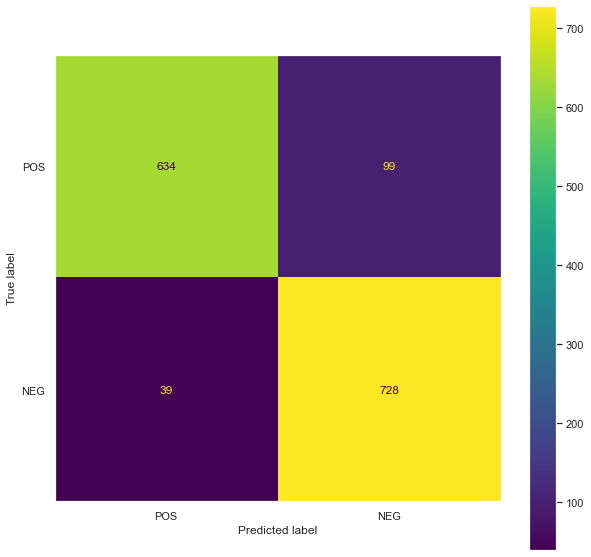

In [153]:
#Grafico una matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay
lab = ["POS","NEG"]
cm = confusion_matrix(test.sentiment, pred, labels = lab)

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lab)
disp = disp.plot(include_values=True,
                 cmap="viridis", ax=ax)
plt.grid(False)
plt.show()

Tal como ocurrió con el algoritmo de scikit-learn, aumenta notablemente la **cantidad de aciertos** en la predicción de etiquetas con este formato.

Otra vez, una de las características más interesantes de SpaCy es la de poder ingresarle un texto y que realice el proceso en el pipeline sin necesidad de vectorizarlo antes. Dos ejemplos:

In [167]:
calif_prueba = "Muy buen producto, estoy muy contenco con la compra."
doc = nlp_bi(calif_prueba)
valor = max(doc.cats, key=lambda key: doc.cats[key])
print("Calificación obtenida: "+str(valor))

Calificación obtenida: POS


In [168]:
calif_prueba = "El producto llegó bien, pero no es el color que quería ni tiene un buen acabado. No lo recomiendo."
doc = nlp_bi(calif_prueba)
valor = max(doc.cats, key=lambda key: doc.cats[key])
print("Calificación obtenida: "+str(valor))

Calificación obtenida: NEG


# Conclusiones

Si bien utilizando SpaCy no se logró mejorar las métricas de accuracy del sprint anterior, la librería deja en claro que es **muy útil y práctica**, en especial al no perder interpretabilidad: poder ingresarle un texto y que realice la categorización sin mayor preparación es fundamental para entender el proceso. 

Queda en claro que la **clasificación multiclase** es un punto **débil** del NLP, al menos en esta instancia. Quedará para un hipotético próximo sprint ver si mejora la calificación al entrenar más épocas, pero por la cantidad de procesamiento que requiere esta tarea se necesita un equipo más potente, como un GPU dedicado, y por ahora no está a mi alcance. También queda ver si **probando con BERT** (Bidirectional Encoder Representations from Transformers), uno de los algoritmos que utiliza Google para NLP, que también puede usarse con SpaCy, mejora esta clasificación. 

A título personal, la experiencia adquirida con estas técnicas y metodologías es **más que positiva**, especialmente haber aprendido el manejo de datos con Pandas, el uso de Python, y las herramientas de NLP, que ya estoy empleando en mi labor profesional y que espero seguir desarrollando y aprendiendo a futuro.

[Link a Github](https://github.com/elcarpogh/NLP_TP_Final)